In [1]:
%load_ext watermark


In [2]:
from IPython.display import display, HTML
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from teeplot import teeplot as tp
from tqdm import tqdm

from pylib._seed_global_rngs import seed_global_rngs


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-04T00:50:10.893367+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

seaborn   : 0.13.2
teeplot   : 1.4.2
pandas    : 2.2.3
matplotlib: 3.9.2
numpy     : 2.1.2

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-04-30-profile-mut-screen"
teeplot_subdir


'2025-04-30-profile-mut-screen'

In [5]:
seed_global_rngs(1)


## Get Data


In [6]:
df = pd.read_parquet("https://osf.io/9rck3/download")


In [7]:
df["replicate_uuid"].nunique()


15

In [8]:
df["is_focal_mutation"] = df["mut_char_pos"] == 0


In [9]:
stats = (
    "binom_p",
    "binom_stat",
    "trinom_p",
    "trinom_stat",
    "trinom_p_fill0",
    "trinom_stat_fill0",
    "mw_p",
    "cliffs_delta",
    "mw_p_dropna",
    "cliffs_delta_dropna",
)


In [10]:
records = []
groups = df[
    (df["trt_hsurf_bits"] == 0)
    & (df["trt_n_downsample"] == df["trt_n_downsample"].max())
    & (df["tb_stat"].str.contains("ratio"))
].groupby(
    ["trt_name", "replicate_uuid", "screen_uuid", "screen_name", "tb_stat"],
    observed=True,
)
for (trt_name, replicate_uuid, screen_uuid, screen_name, tb_stat), grp in tqdm(
    groups,
):
    grp_focal = grp[grp["is_focal_mutation"]]
    grp_nonfocal = grp[~grp["is_focal_mutation"]]

    record = {
        "trt_name": trt_name,
        "replicate_uuid": replicate_uuid,
        "screen_uuid": screen_uuid,
        "screen_name": screen_name,
        "tb_stat": tb_stat,
    }

    records.append(
        {
            **record,
            **{
                stat: (
                    np.nan if len(grp_focal) == 0 else grp_focal[stat].item()
                )
                for stat in stats
            },
            **{"mutation": "focal"},
        },
    )
    for __ in range(1_000):
        records.append(
            {
                **record,
                **{
                    stat: grp_nonfocal[stat].sample(1).item() for stat in stats
                },
                **{"mutation": "nonfocal"},
            },
        )


100%|██████████| 420/420 [06:25<00:00,  1.09it/s]


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.png


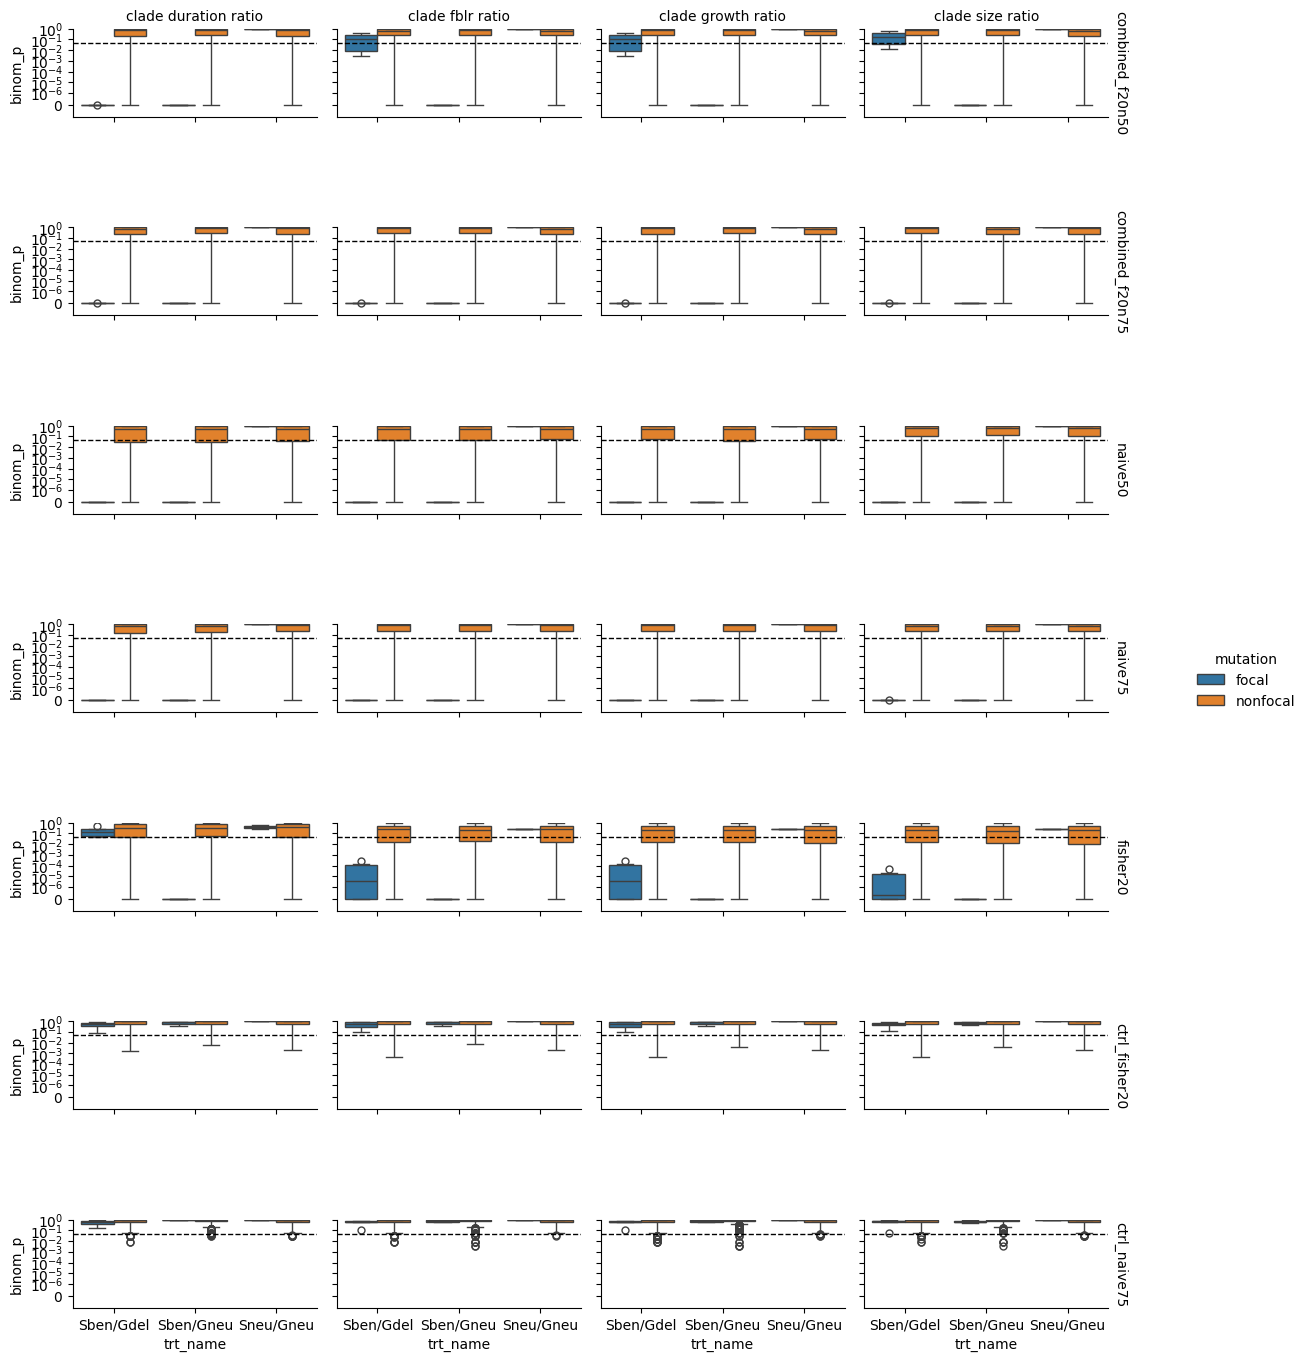

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.png


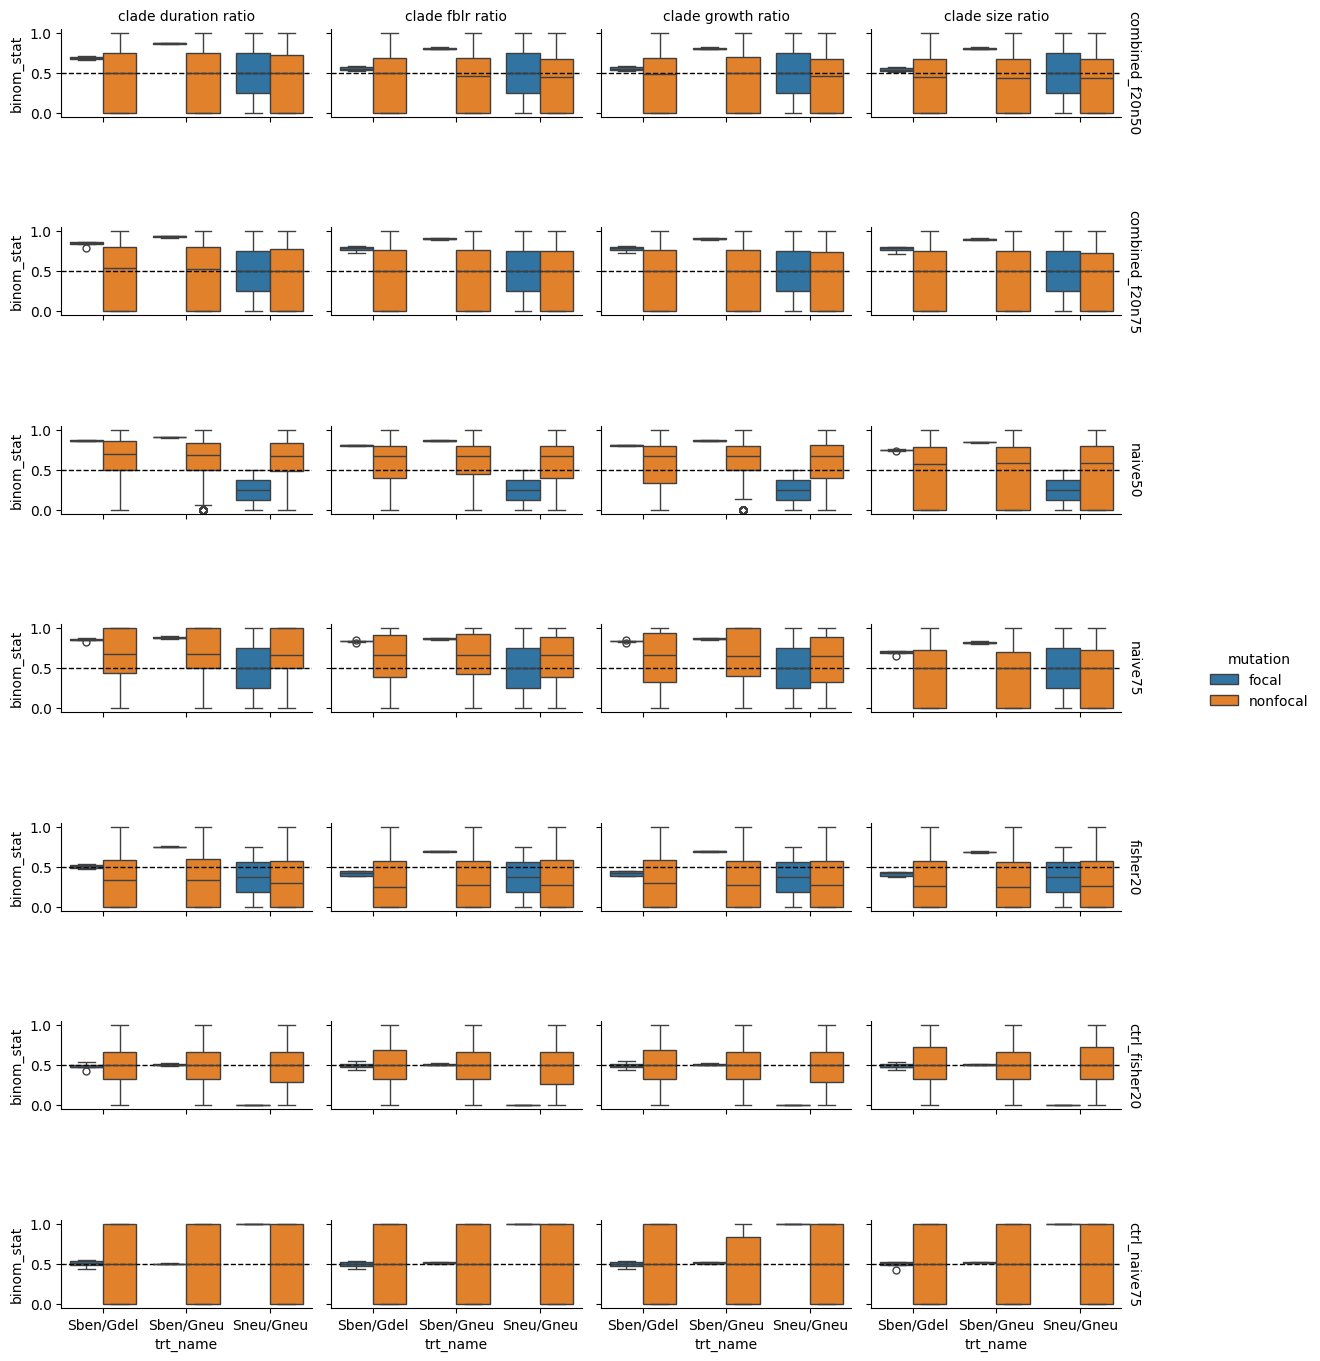

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.png


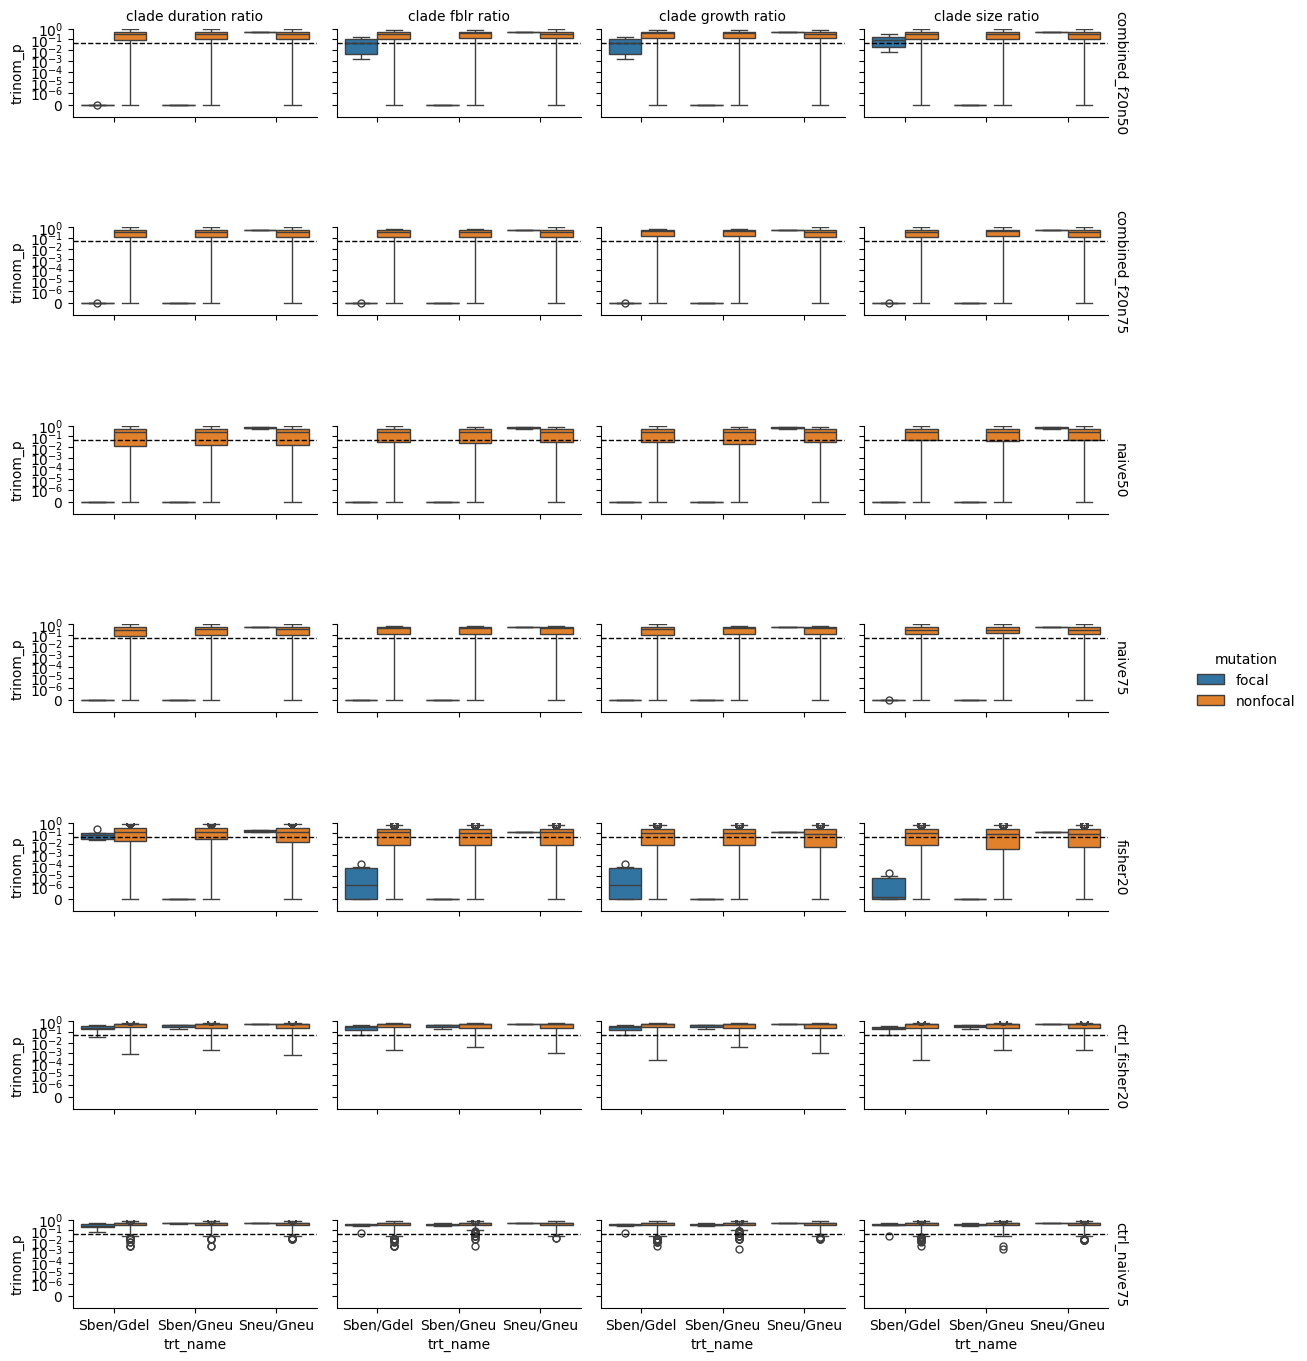

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.png


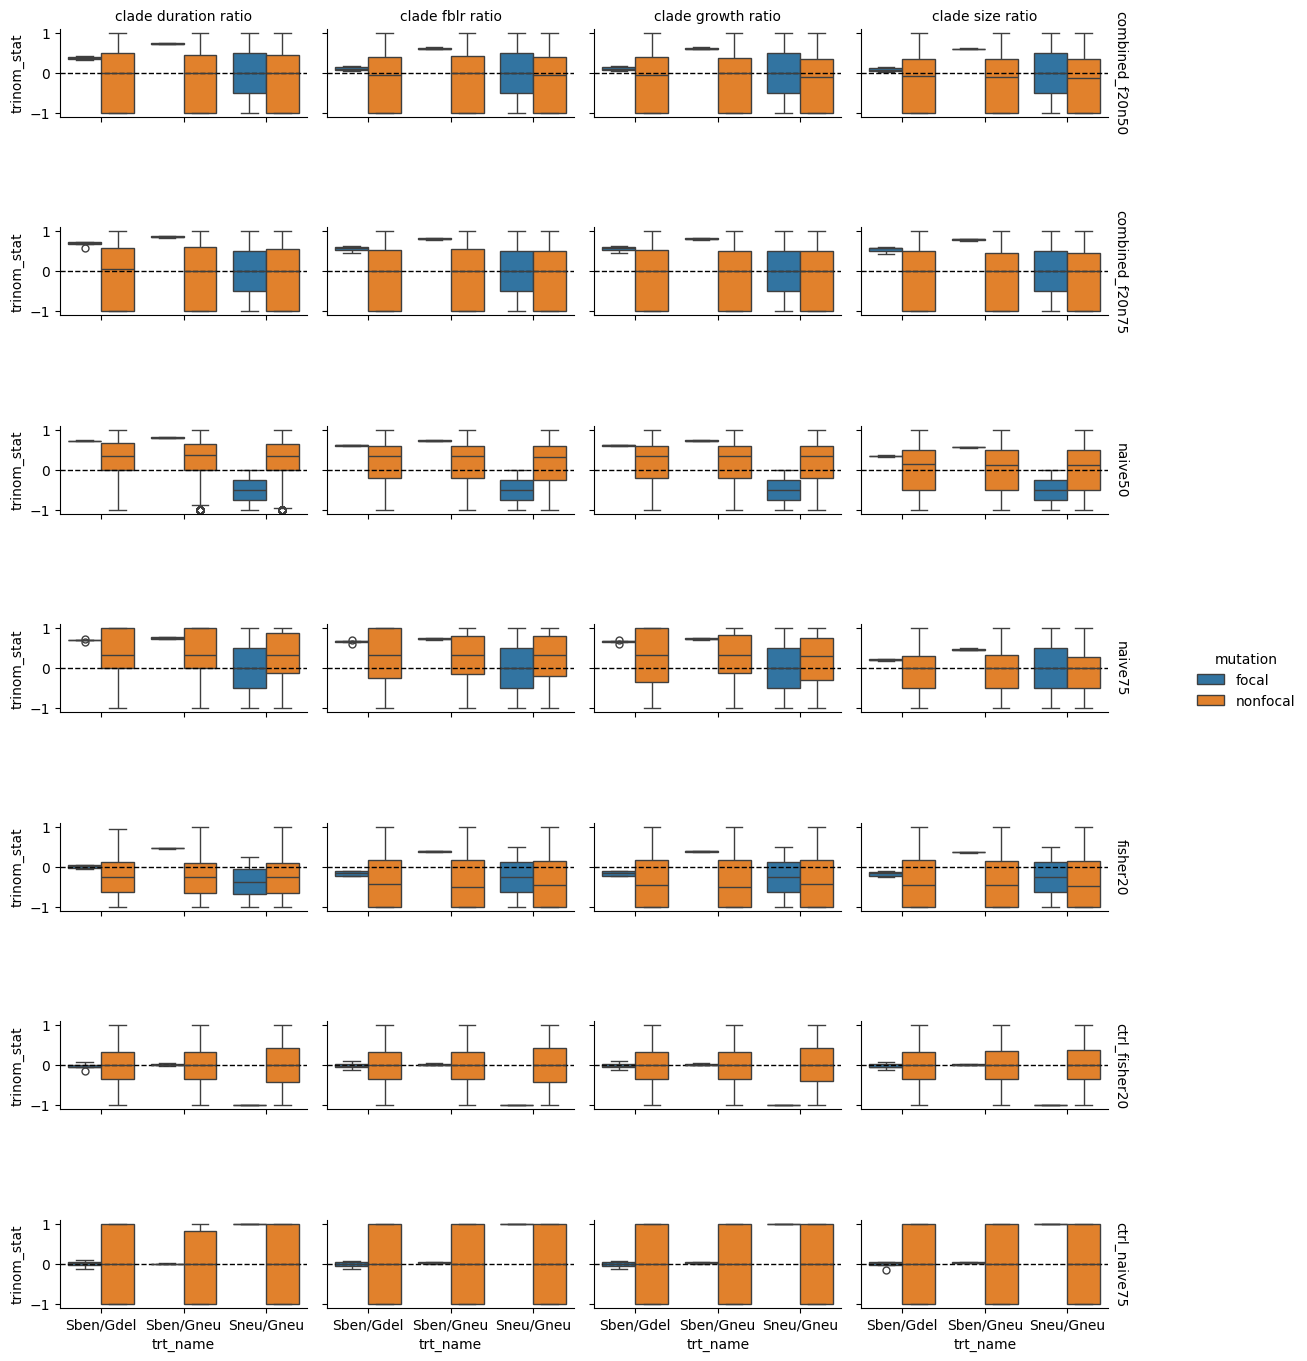

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.png


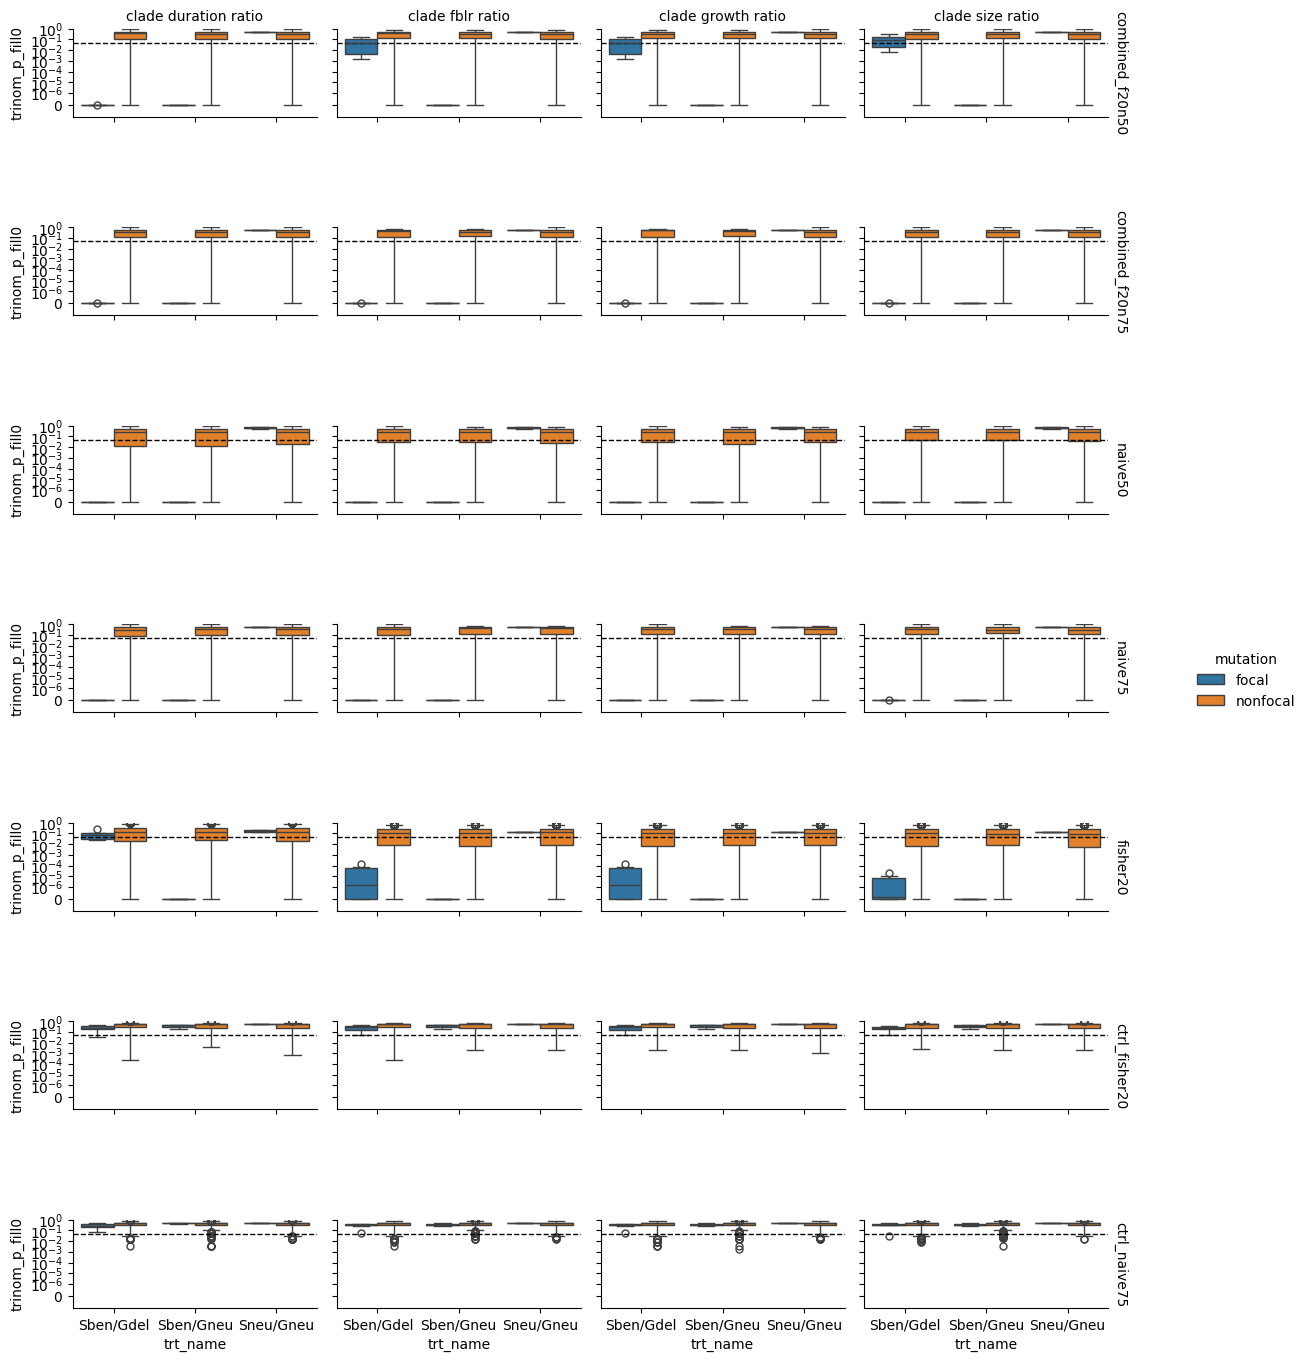

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.png


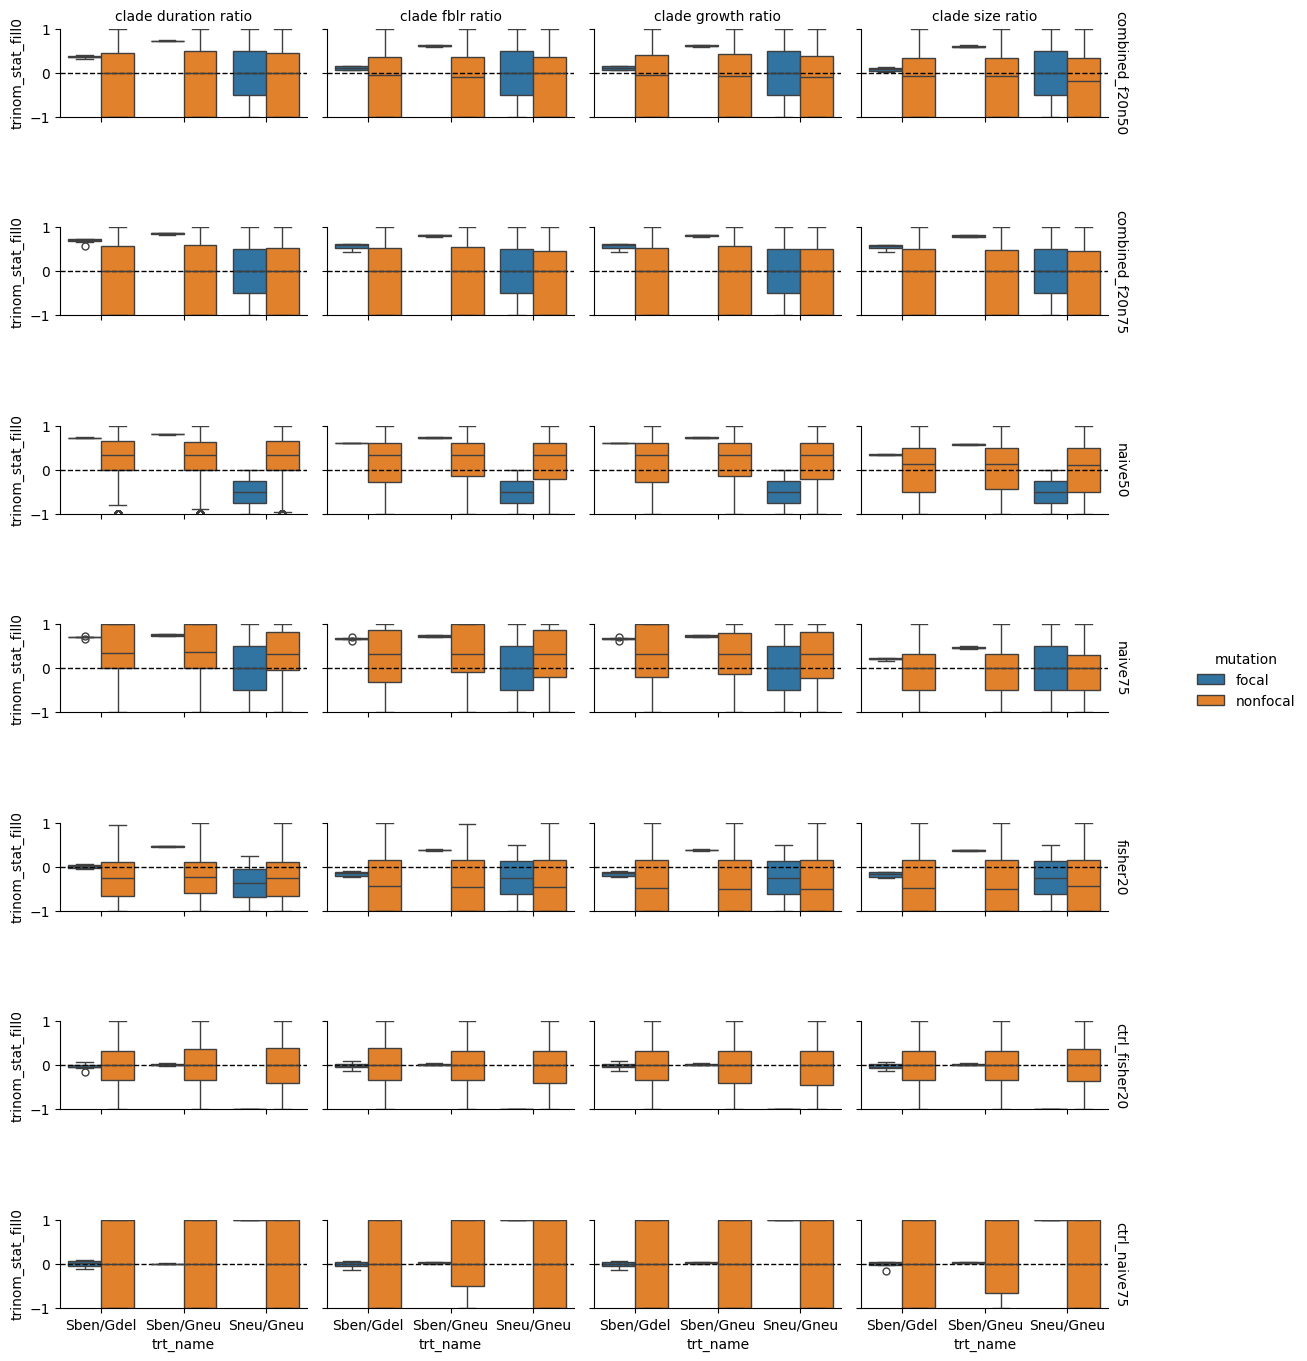

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.png


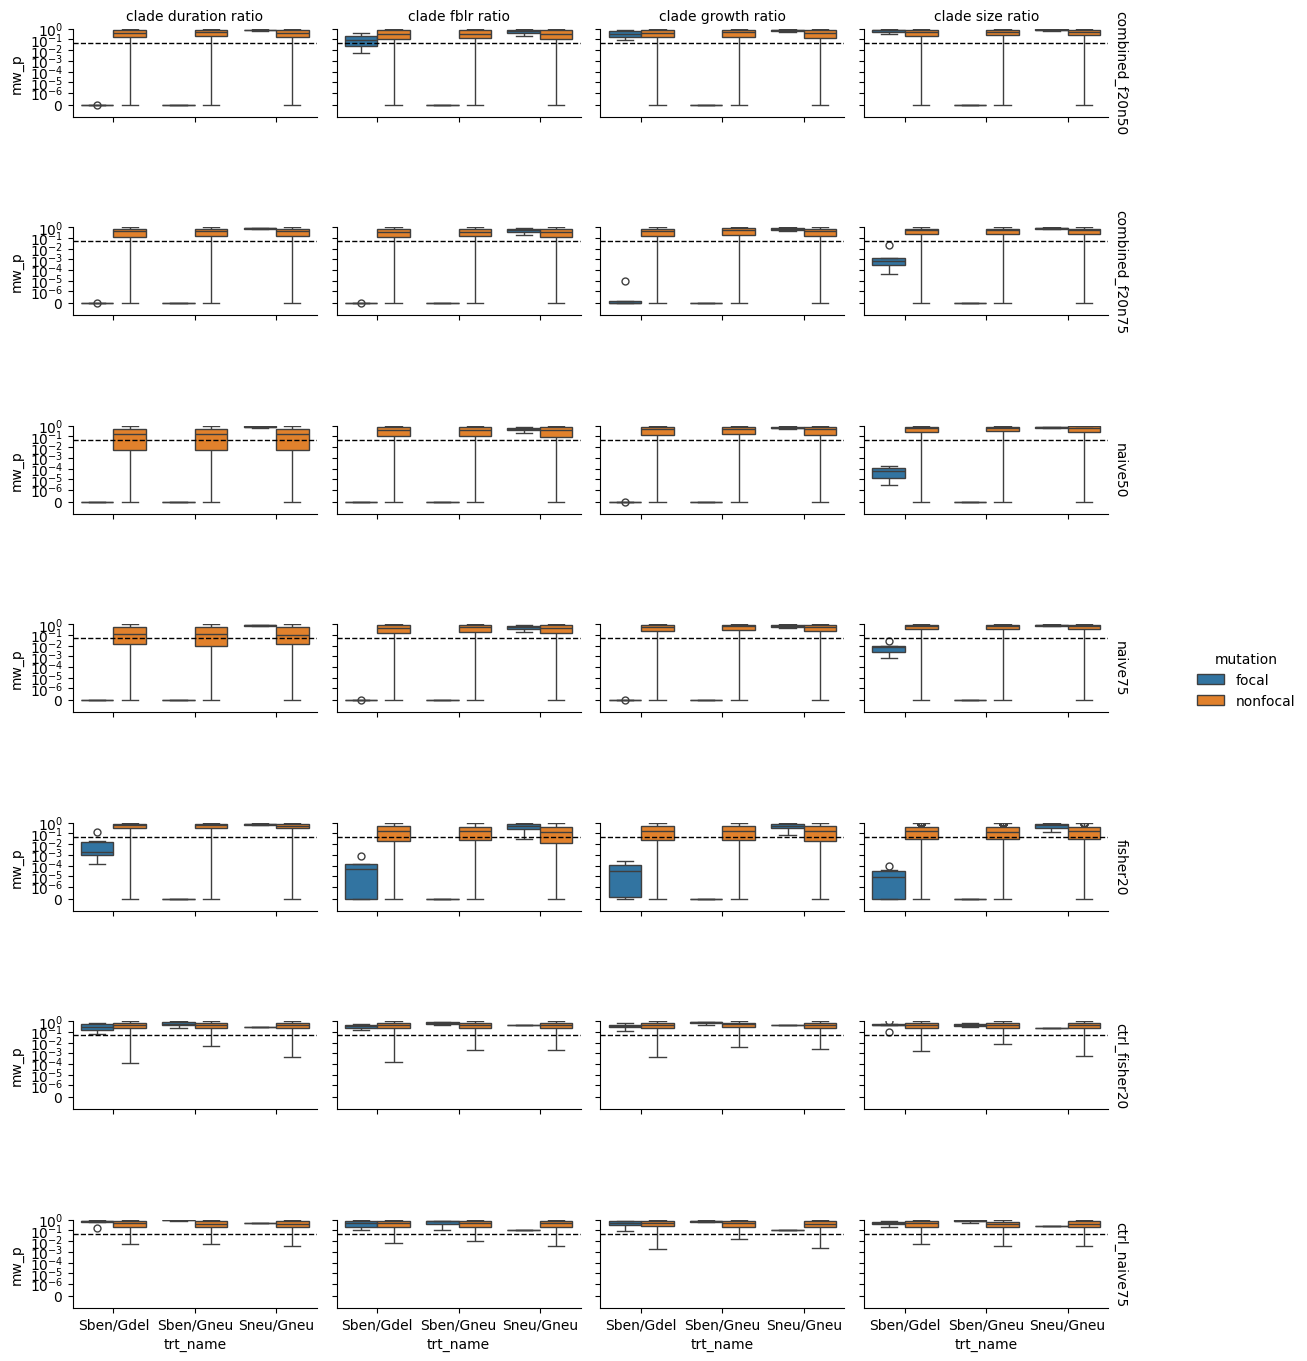

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.png


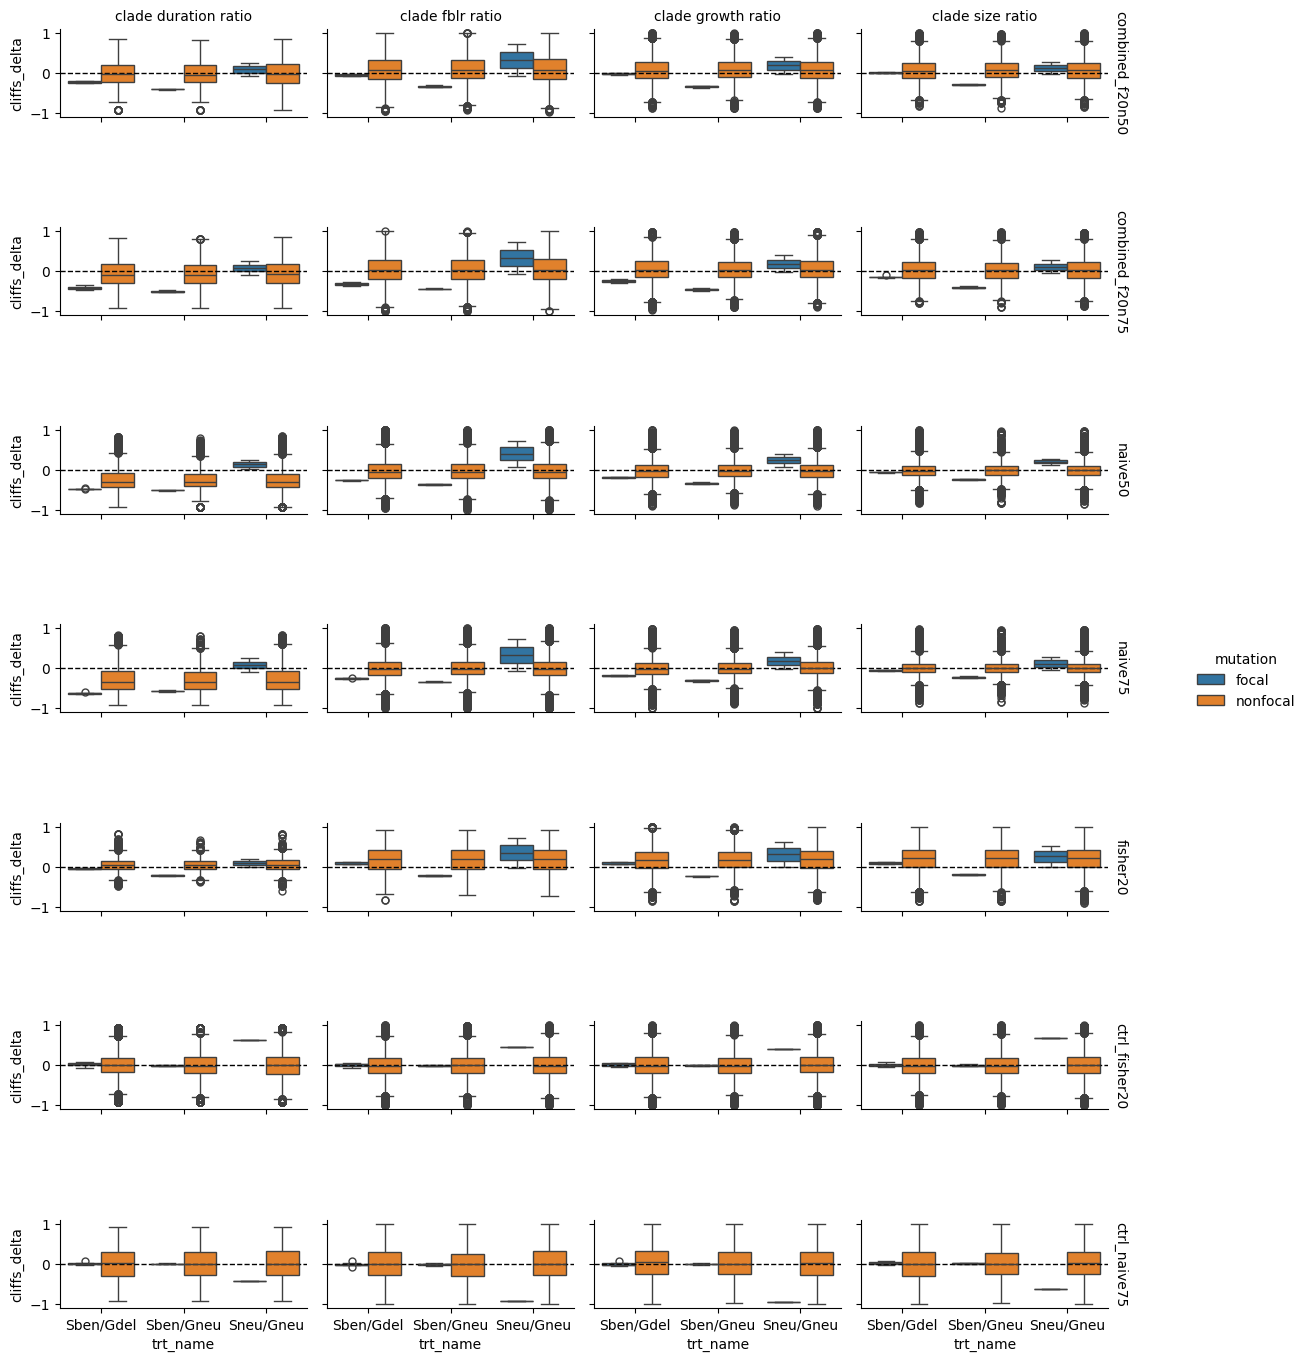

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.png


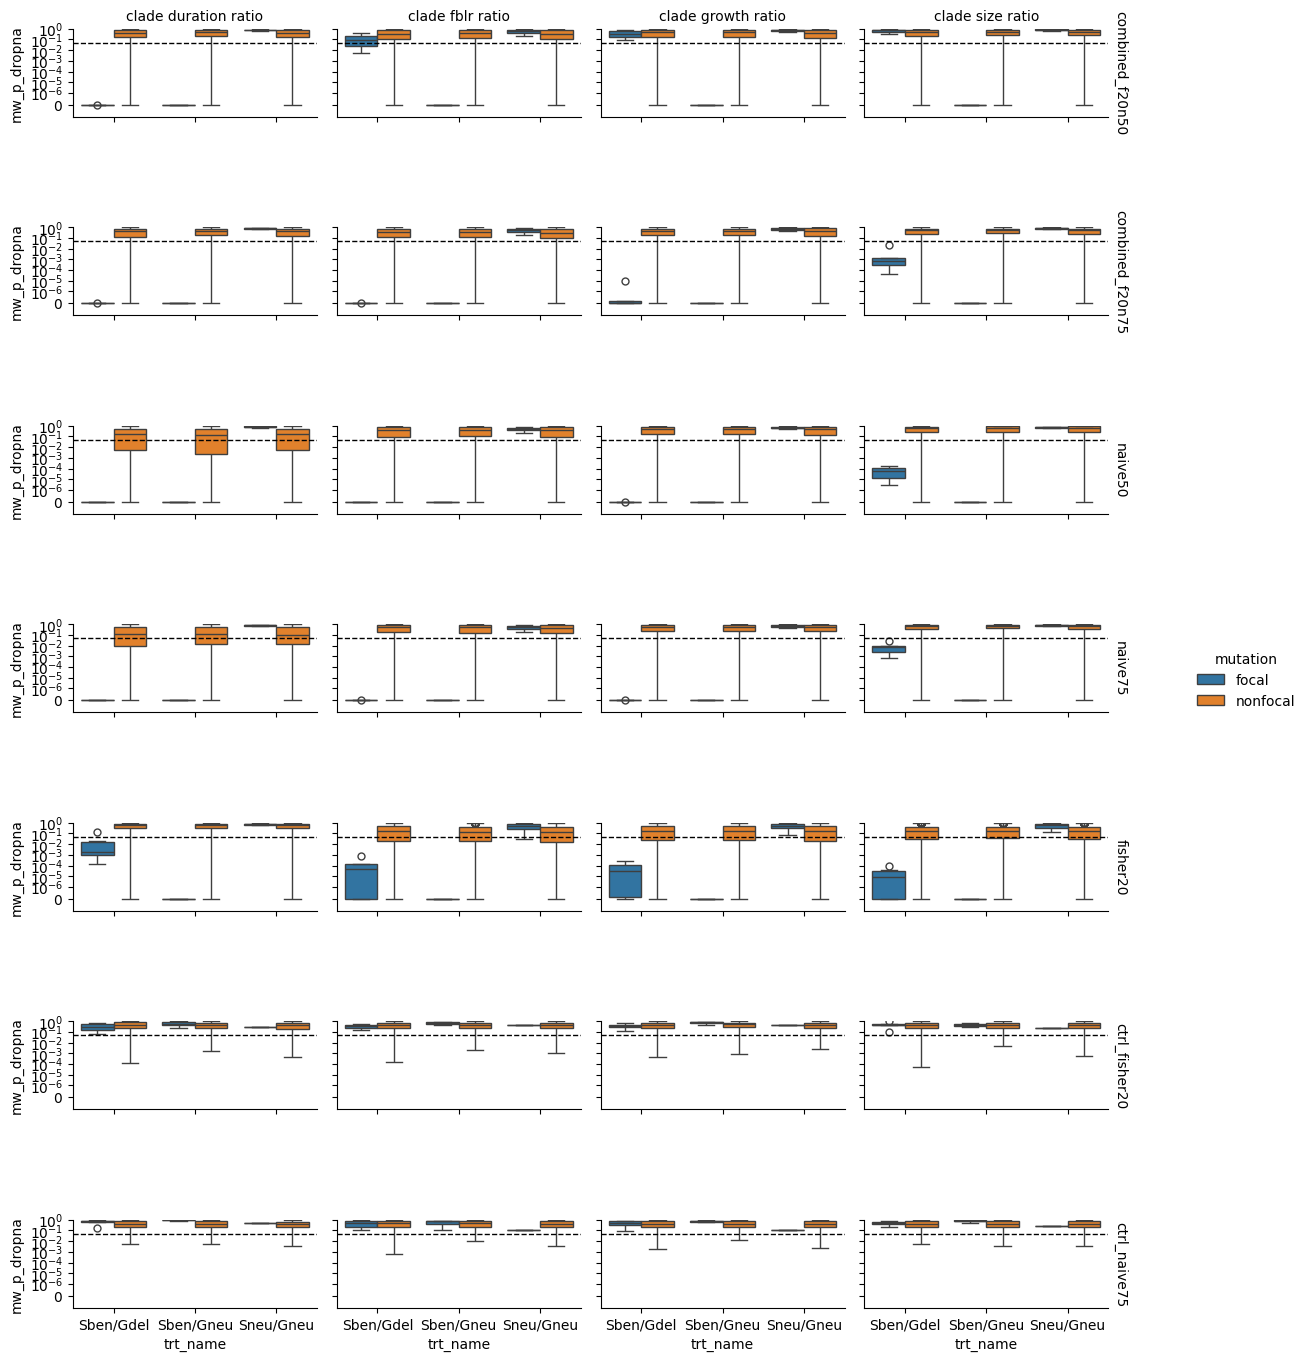

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.png


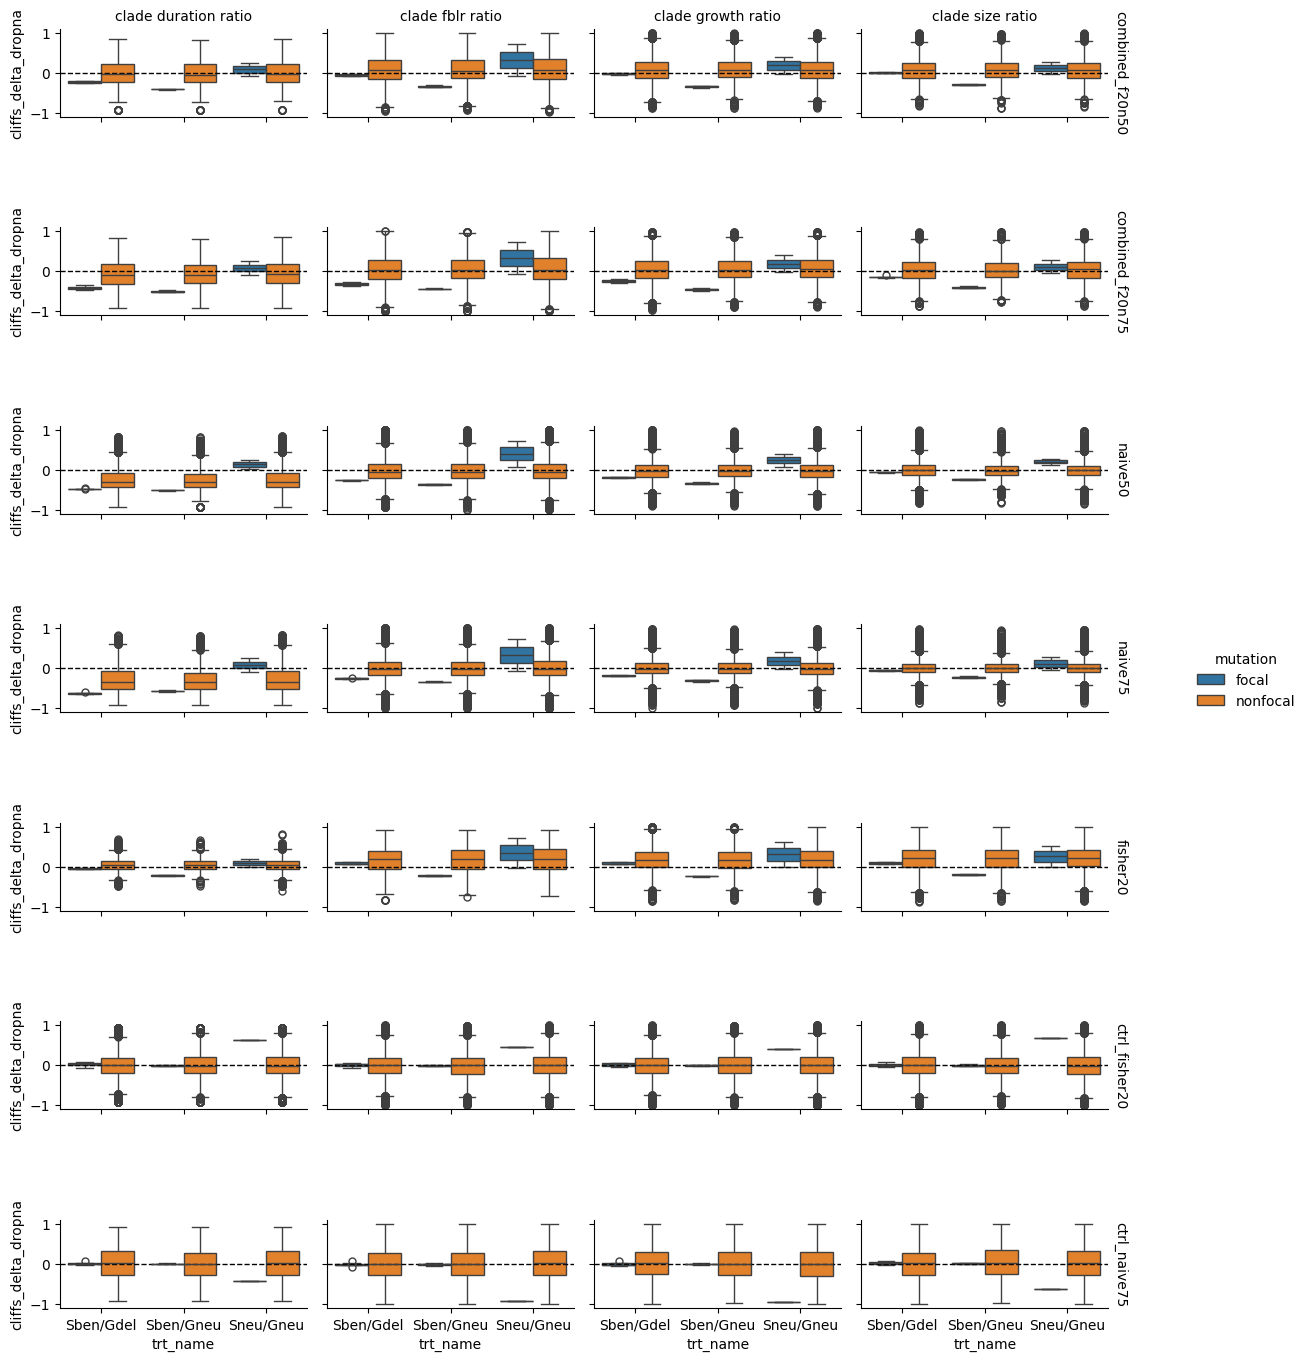

In [11]:
for stat in stats:
    display(HTML(f"<h3>{stat}</h3>"))
    with tp.teed(
        sns.catplot,
        data=pd.DataFrame(records),
        x="trt_name",
        y=stat,
        hue="mutation",
        row="screen_name",
        col="tb_stat",
        kind="box",
        height=2,
        aspect=1.5,
        margin_titles=True,
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.set(
            ylim={
                "binom_p": (-1e-6, 1),
                "binom_stat": (-0.05, 1.05),
                "trinom_p": (-1e-6, 1),
                "trinom_stat": (-1.1, 1.1),
                "trinom_p_fill0": (-1e-6, 1),
                "trinom_stat_fill0": (-1, 1),
                "mw_p": (-1e-6, 1),
                "cliffs_delta": (-1.1, 1.1),
                "mw_p_dropna": (-1e-6, 1),
                "cliffs_delta_dropna": (-1.1, 1.1),
            }[stat],
        )
        if "_p" not in stat:
            teed.map(
                plt.axhline,
                y={
                    "binom_stat": 0.5,
                    "trinom_stat": 0,
                    "trinom_stat_fill0": 0,
                    "cliffs_delta": 0,
                    "cliffs_delta_dropna": 0,
                }[stat],
                color="black",
                linestyle="--",
                linewidth=1,
            )
        else:
            for ax in teed.axes.flatten():
                ax.set_yscale("symlog", linthresh=1e-6)

            teed.map(
                plt.axhline,
                y=0.05,
                color="black",
                linestyle="--",
                linewidth=1,
            )


In [12]:
df.loc[
    (df["trt_name"] == "Sben/Gneu")
    & (df["mut_char_pos"] == 0)
    & (df["tb_stat"].str.endswith("ratio")),
    [
        "mut_nobs",
        "mut_freq",
        "binom_n",
        "binom_k",
        "binom_p",
        "mw_p_dropna",
        "tb_stat",
        "screened_N",
        "trt_name",
        "mut_char_pos",
        "screened_nanmean",
    ],
].sample(25)


,mut_nobs,mut_freq,binom_n,binom_k,binom_p,mw_p_dropna,tb_stat,screened_N,trt_name,mut_char_pos,screened_nanmean
131884,9822,0.016101,4017,1557,0.000000e+00,0.000000e+00,clade size ratio,4183,Sben/Gneu,0,-0.484486
98980,18404,0.030120,1375,1180,0.000000e+00,0.000000e+00,clade duration ratio,1385,Sben/Gneu,0,NaN
65954,11059,0.018264,1876,650,7.650809e-41,0.000000e+00,clade duration ratio,2250,Sben/Gneu,0,NaN
32943,20854,0.034385,903,820,0.000000e+00,0.000000e+00,clade growth ratio,903,Sben/Gneu,0,0.017739
65960,11059,0.018264,1081,523,3.010829e-01,2.384408e-01,clade duration ratio,1511,Sben/Gneu,0,NaN
229737,21453,0.035575,3361,2324,0.000000e+00,0.000000e+00,clade size ratio,3383,Sben/Gneu,0,1.380461
131879,9822,0.016101,991,529,3.597954e-02,8.772240e-02,clade growth ratio,1035,Sben/Gneu,0,0.000634
32947,20854,0.034385,504,255,8.237826e-01,4.723099e-01,clade growth ratio,504,Sben/Gneu,0,0.003444
131875,9822,0.016101,7818,3721,2.216190e-05,1.425727e-16,clade growth ratio,8310,Sben/Gneu,0,-0.000783
99007,18404,0.030120,280,144,6.757814e-01,9.878182e-01,clade size ratio,291,Sben/Gneu,0,-0.001942
